In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
from util import *
df = pd.read_csv("movies.csv")
df = df.drop(columns=[
    "id", 
    # "title", 
    "status", 
    # "release_date", # TODO: this is temporary, might keep this column
    "production_companies", 
    "credits", 
    "poster_path", 
    "backdrop_path", 
    "recommendations", 
    "keywords", 
    "tagline"
])

df = df.dropna(subset=['release_date'])
df["month"] = df["release_date"].apply(lambda val: str(val.split("-")[1]))

df = df[
    (df["budget"] > 0)
    & (df["revenue"] > 0)
    & (df["vote_count"] > 10)
    & (df["vote_average"] > 0)
    & (df["runtime"] > 0)
]
df = df.drop_duplicates(subset=["title", "release_date"])
df = df.drop(columns=["release_date", "title"])
df = df.dropna(subset=["genres", "runtime", "overview"])
languages_to_keep = df["original_language"].value_counts().nlargest(15).index
df["original_language"] = df["original_language"].apply(lambda row: row if row in languages_to_keep else "other")
df["profit_margin"] = profit_margin(df["budget"], df["revenue"])
cols_to_adjust = ["popularity", "budget", "vote_count"]
for i in cols_to_adjust: 
    df[i] = np.log1p(df[i])
df = df[df["profit_margin"] > -5]
df["profit_margin"] = np.exp(df["profit_margin"])
df = df.drop(columns="revenue")
df.head()

,genres,original_language,overview,popularity,budget,runtime,vote_average,vote_count,month,profit_margin
0,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,9.078522,18.675323,116.0,7.079,7.219642,08,1.884347
1,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,8.691857,16.705882,103.0,7.433,6.302619,04,2.066645
2,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,8.596024,19.113828,127.0,7.340,6.915723,06,1.663052
3,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,8.395339,19.113828,125.0,6.507,7.941651,02,1.785370
4,Drama-Action,en,After dominating the boxing world Adonis Creed...,8.292884,18.132999,116.0,7.262,7.029973,03,2.056879


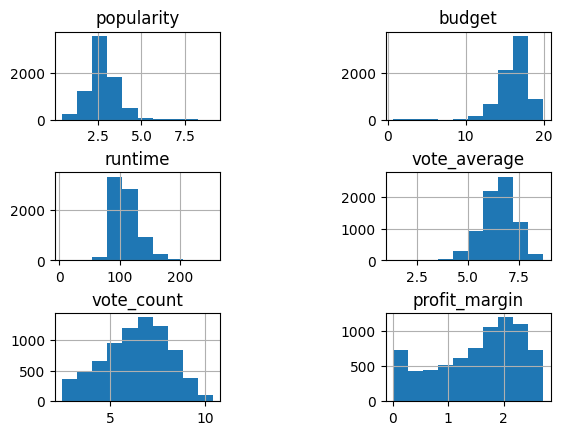

In [80]:
df.hist()
plt.subplots_adjust(wspace=1, hspace=0.6)
plt.show()

In [81]:
cols_to_min_max_normalize = ["popularity", "budget", "runtime", "vote_average", "vote_count"]
# get the mins and maxs so we can translate the profit margin (label) back to its actual value
# for i in cols_to_log_normalize:
#     df[i] = np.log1p(df[i])
mins = df[cols_to_min_max_normalize].min()
maxs = df[cols_to_min_max_normalize].max()
min_max_df = pd.DataFrame({"min": mins, "max": maxs})
min_max_df.to_csv("min_maxs.csv")
for i in cols_to_min_max_normalize:
    min_val = df[i].min()
    max_val = df[i].max()
    df[i] = (df[i] - min_val) / (max_val - min_val)



In [82]:
df = multihot_tf_idf(df, "overview")
df = multihot_column(df, "-", "genres")
df = multihot_column(df, "-", "month")
df = pd.get_dummies(df, columns=["original_language"], dtype=int)

In [85]:
# df = df.drop(columns="revenue")
# get the 80% for training
train, test = train_test_split(df, test_size=0.2)
# split the remaining into 10 and 10
val, test = train_test_split(test, test_size=0.5)
train.to_csv("train.csv", index=False)
val.to_csv("validation.csv", index=False)
test.to_csv("test.csv", index=False)

In [ ]:
train.describe()

In [ ]:
val["profit_margin"].hist()

In [86]:
train.shape, val.shape, test.shape

((6058, 73), (757, 73), (758, 73))

In [ ]:
df["profit_margin"].describe()

In [ ]:
test = pd.read_csv("movies.csv")
# test = test[["budget", "revenue", "popularity", "vote_count"]].dropna()
test = test[["budget", "revenue", "popularity", "vote_count", "vote_average", "runtime"]].dropna()
# test = test.drop(columns="id")
test = test[
    (test["budget"] > 0)
    & (test["revenue"] > 0)
    & (test["vote_count"] > 10)
    & (test["vote_average"] > 0)
    & (test["runtime"] > 0)
]
# # test["revenue"] = np.log(test["revenue"])
# test["profit_margin"] = profit_margin(test["budget"], test["revenue"])
# test[test["profit_margin"] > -9999].shape
# test = test[test["profit_margin"] > -9999]
# test.describe()
# test["popularity"] = np.log(test["popularity"])
# test["vote_count"] = np.log(test["vote_count"])
# test["budget"] = np.log(test["budget"])
# # test["vote_average"] = np.log(test["vote_average"])
# test = test.drop(columns=["revenue"])
test["revenue"].hist()

In [ ]:
test["revenue"].describe()

In [ ]:
test.hist()

In [ ]:
df[["revenue", "budget"]].hist()